<img src='https://media.istockphoto.com/id/1495819409/pt/foto/digital-mind-brain-artificial-intelligence-concept.jpg?s=612x612&w=0&k=20&c=6uJ3sLwDKjMluKNQl1omAiQgfaCSw_IKRhFvQJ5CpWk=' alt='neural network' width=800>

There are many definitions for a [regression problem](https://en.wikipedia.org/wiki/Regression_analysis) but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:

* Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms, etc).
* Predict the coordinates of a bounding box of an item in an image.
* Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

# Typical architecture of a regression neural network

The word *typical* is on purpose.

Why?

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputting some kind of target number.

Yes, the previous sentence is vague but we'll see this in action shortly.

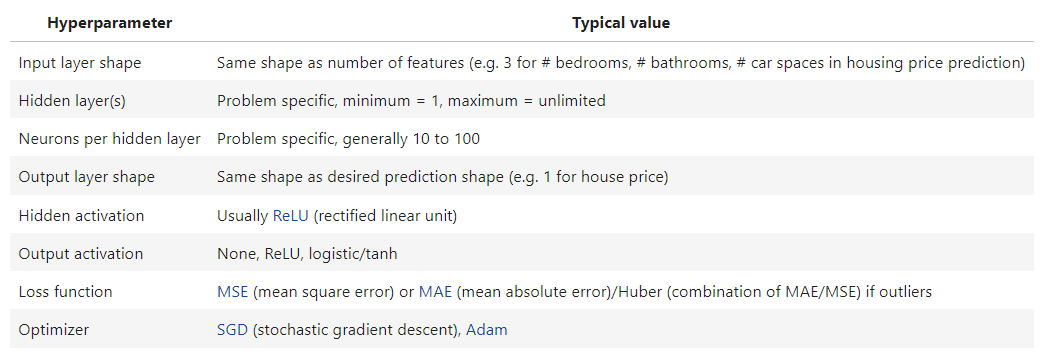

*Table 1*: Typical architecture of a regression network. Source: Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

Again, if you're new to neural networks and deep learning in general, much of the above table won't make sense. But don't worry, we'll be getting hands-on with all of it soon.

> 🔑 Note: A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on it's own (a value not explicitly set by an analyst).

# Import statements

In [156]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import pandas as pd
from google.colab import files, drive
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

2.17.0


# Create data to view and fit

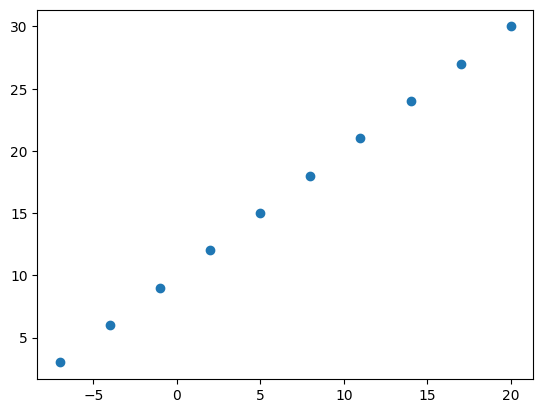

In [157]:
# Create features(input layer shape)
#  Is typical that features in capital
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0, 17.0, 20.0])  # indepedent variavel

# Create labels(output layer shape)
# Is typical that labels in lower cases
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0, 30.0])  # depedent variável

# Visualize it
plt.scatter(X, y)

In [158]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Before we do any modelling, can you calculate the pattern between X and y?

For example, say I asked you, based on this data what the y value would be if X was 17.0?

Or how about if X was -10.0?

This kind of pattern discovery is the essence of what we'll be building neural networks to do for us.

# Input and Output shapes

One of the most important concepts when working with neural networks are the input and output shapes.

The **input shape** is the shape of your data that goes into the model.

The **output shape** is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

In [159]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [160]:
X[0], y[0]

(-7.0, 3.0)

In [161]:
input_shapes = X.shape
output_shape = y.shape
input_shapes, output_shape

((10,), (10,))

In [162]:
# Turn our Numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14., 17., 20.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.], dtype=float32)>)

# Steps in modelling with tensorflow

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

Let's see these in action using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to build a model for our regression data. And then we'll step through each.

> Note: If you're using [TensorFlow 2.7.0+](https://github.com/tensorflow/tensorflow/releases/tag/v2.7.0), the `fit()` function no longer upscales input data to go from `(batch_size, )` to `(batch_size, 1)`. To fix this, you'll need to expand the dimension of input data using `tf.expand_dims(input_data, axis=-1)`.

In our case, this means instead of using `model.fit(X, y, epochs=5)`, use `model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)`.

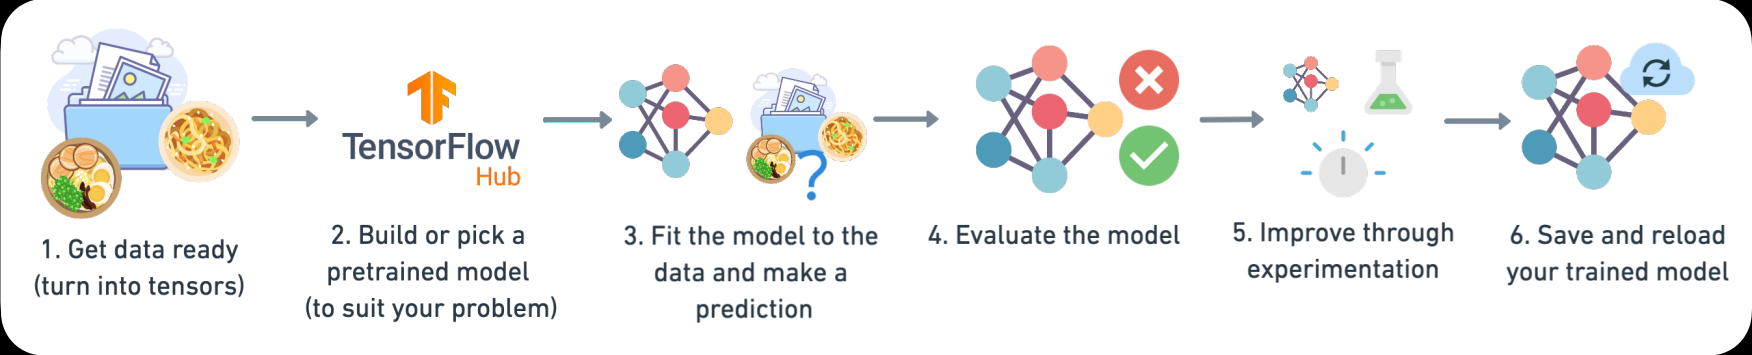

In [163]:
# Set random seed(to produce reproducibility)
tf.random.set_seed(42)

## 1. Create a model with Sequential API

In [164]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)])  # it's 1 because we input 1 number and predict 1 number

## 2. Compile the model

In [165]:
model.compile(loss=tf.keras.losses.mae, # mae stand for mean absolute error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

## 3. Fit the model

In [166]:
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)  # 5 its like tentativas, ou seja, vai ter 5 tentivas para prever

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step - loss: 16.3175 - mae: 16.3175
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 15.8850 - mae: 15.8850
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 15.4525 - mae: 15.4525
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 15.0201 - mae: 15.0201
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 14.5875 - mae: 14.5875


# Try and make a prediction using our model

In [167]:
# Vai dar erro se colocar: model.predict([17.0])
model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[6.052178]], dtype=float32)

# Improve our model

How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

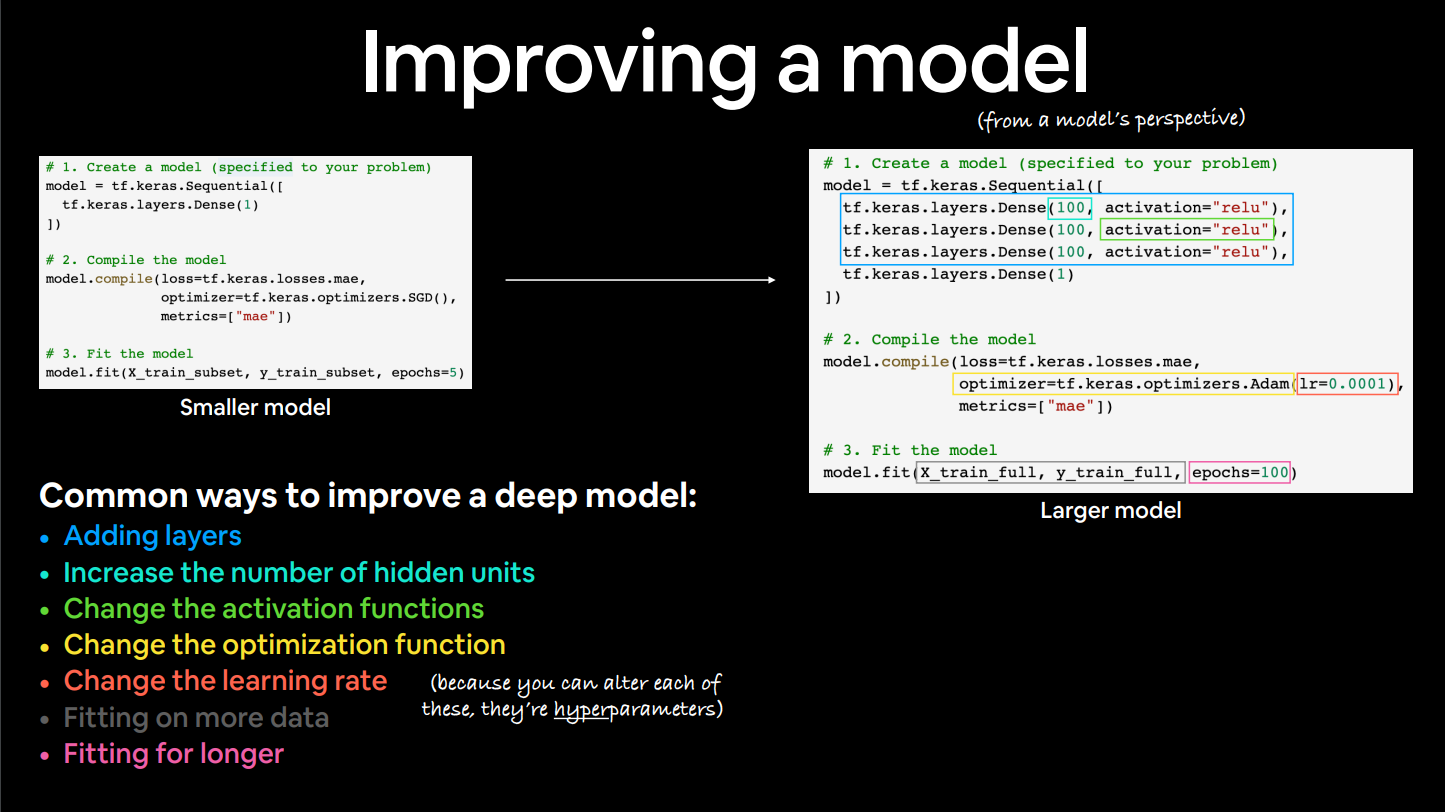

## Improve the model

1. `tf.keras.Sequential`:
* Esta linha cria um objeto Sequential que representa a estrutura básica da rede neural. Uma rede sequencial é composta por camadas dispostas em sequência, onde a saída de uma camada é a entrada da próxima.
2. `tf.keras.layers.Dense`:
* Esta linha adiciona uma camada densa à rede neural. Uma camada densa é uma camada totalmente conectada, onde cada neurônio(neurons) está conectado a todos os neurônios da camada anterior.
3. **Camadas intermediárias**:
* As duas camadas intermediárias `Dense(100, activation='relu')` têm a mesma estrutura da primeira camada, com 100 neurônios e função de ativação ReLU. Essas camadas são responsáveis por extrair características mais complexas dos dados à medida que a informação é processada pela rede
4. **Camada de saída**:
* A última camada `Dense(1)` tem apenas um neurônio, pois o objetivo é prever um único valor. Esta camada é responsável por produzir a saída final da rede neural.

In [168]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1),
])

## Improve the compile model

In [169]:
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

## Improve the fit model

In [170]:
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 14.5342 - mae: 14.5342
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 13.2430 - mae: 13.2430
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.9496 - mae: 11.9496
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 10.6529 - mae: 10.6529
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 9.3496 - mae: 9.3496
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 8.0346 - mae: 8.0346
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 6.7017 - mae: 6.7017
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 6.1183 - mae: 6.1183
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 6.5298 - mae: 6.5298
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 7.0928 - mae: 7.0928
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 7.4747 - mae: 7.4747
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 7.6051 - mae: 7.6051
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34

# Try and make a prediction in our new model

In [171]:
model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[26.935104]], dtype=float32)

> 🔑**Note**: Basicamente, tive a fazer alterações aleatórias até chegar ao melhor modelo e aumentei 2 elementos ao X e y!

# Evaluating a model

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaluate it -> build (tweak) a model -> evaluate it...
The tweaking comes from maybe not building a model from scratch but adjusting an existing one.
```

## Visualize, Visualize, Visualize

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:

* The data - what data are you working with? What does it look like?
* The model itself - what does the architecture look like? What are the different shapes?
* The training of a model - how does a model perform while it learns?
* The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).

In [172]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [173]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

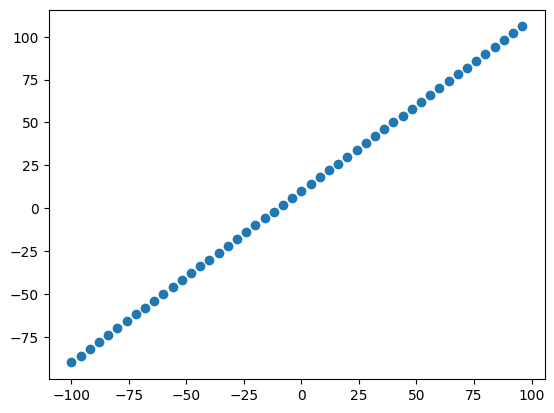

In [174]:
# Visualize the data
plt.scatter(X, y)

## Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

* Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* Validation set - the model gets tuned(ajustado) on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-20% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our `X` and `y` arrays.

> 🔑 **Note**: When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it **generalizes** to unseen examples

In [175]:
# Check the length of how many samples we have
len(X)  # So we have 50 samples

50

In [176]:
# Split the data into train and test set
X_index_80: int = int(len(X) * 0.8)
y_index_80: int = int(len(y) * 0.8)

X_train = X[:X_index_80]  # 80% of X -> 40
X_test = X[X_index_80:]   # 20% of X -> 10

y_train = y[:y_index_80]
y_test = y[y_index_80:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## Visualize the data

Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

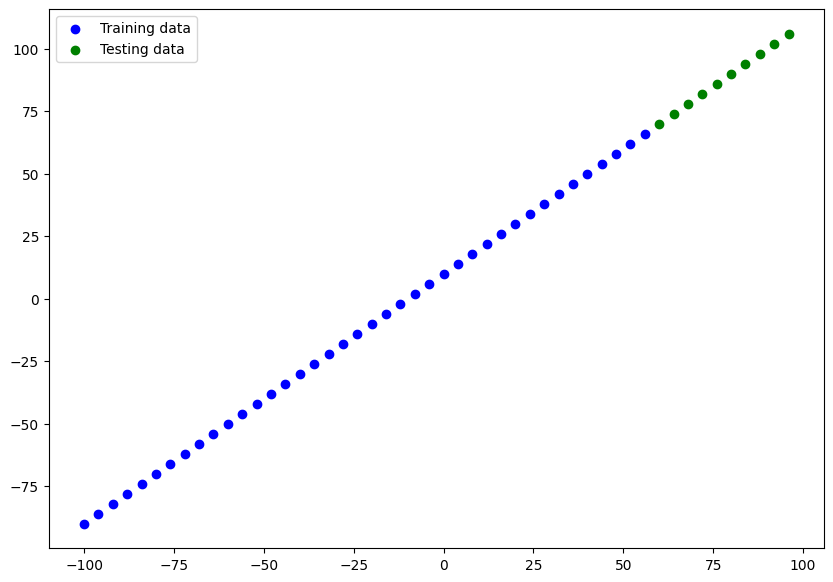

In [177]:
plt.figure(figsize=(10, 7))  # pois vamos ter 2 samples of data
# plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# show a legend
plt.legend();

Let's have a look at how to build a neural network for our data

In [178]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])
# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
# Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

## Visualize the model

After you've built a model, you might want to take a look at it (especially if you haven't built many before).

You can take a look at the layers and shapes of your model by calling `summary()` on it.

> 🔑 Note: Visualizing a model is particularly helpful when you run into input and output shape mismatches.

In [179]:
# model.summary()
# Dava erro

Ahh, the cell above errors because we haven't fit or built our model.

We also haven't told it what input shape it should be expecting.

Remember above, how we discussed the input shape was just one number?

We can let our model know the `input shape` of our data using the `input_shape` parameter to the first layer (usually if input_shape isn't defined, Keras tries to figure it out automatically).

In [180]:
tf.random.set_seed(42)

# Create the model(same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, input_shape=[1], name='output_layer')
], name="model_1")

# Compile the model(same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [181]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters(nºDense * 2).

* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

> 📖 Resource: For a more in-depth overview of the trainable parameters within a layer, check out [MIT's introduction](https://youtu.be/njKP3FqW3Sk) to deep learning video.

> 🛠 Exercise: Try playing around with the number of hidden units in the `Dense` layer (e.g. `Dense(2)`, `Dense(3)`). How does this change the Total/Trainable params? Investigate what's causing the change.

For now, all you need to think about these parameters is that their learnable patterns in the data.

Let's fit our model to the training data.

In [182]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)
# verbose=0, não vai mostrar no output as 100 tentativas

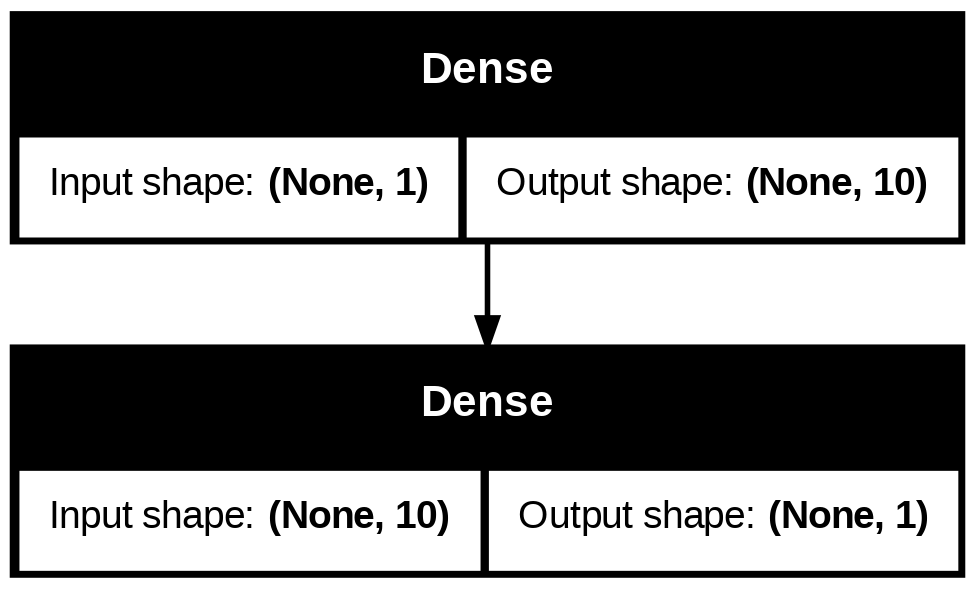

In [183]:
# from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

# Visualizing our model's predictions

Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` vs. `y_pred` (ground truth vs. predictions).

First, we'll make some predictions on the test data (`X_test`), remember the model has never seen the test data.

In [184]:
# Make some predictions
y_preds = model.predict(tf.expand_dims(X_test, axis=-1))
y_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[33.872658],
       [36.027325],
       [38.181988],
       [40.33665 ],
       [42.491314],
       [44.64598 ],
       [46.80064 ],
       [48.955307],
       [51.10997 ],
       [53.264633]], dtype=float32)

In [185]:
# Let's create a ploting function
def plot_predictions(predictions, training_data=X_train, training_labels=y_train, test_data=X_test, test_labels=y_test):
  """Plots training data, test data and compares predictions."""
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(training_data, training_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

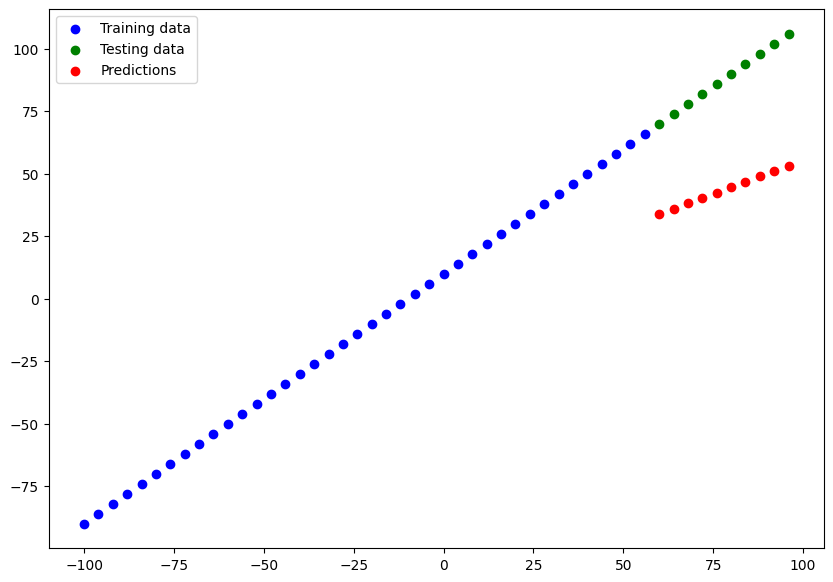

In [186]:
plot_predictions(y_preds)

From the plot we can see our predictions aren't totally outlandish but they definitely aren't anything special either.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


(array([[ 68.7674  ],
        [ 72.69031 ],
        [ 76.613205],
        [ 80.53612 ],
        [ 84.45902 ],
        [ 88.38192 ],
        [ 92.30483 ],
        [ 96.22772 ],
        [100.150635],
        [104.073524]], dtype=float32),
 None)

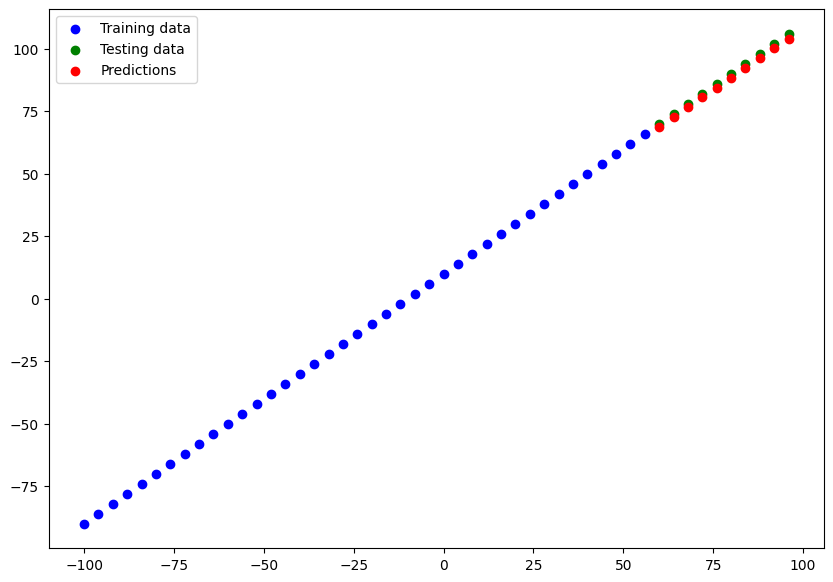

In [187]:
# Vou tentar melhorar:
tf.random.set_seed(42)

# Create the model(same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(11, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, input_shape=[1], name='output_layer')
], name="model_1")

# Compile the model(same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

# Make some predictions
y_preds = model.predict(tf.expand_dims(X_test, axis=-1))

y_preds, plot_predictions(predictions=y_preds)

# Evaluating predictions

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use `model.evaluate()` which will return the loss of the model as well as any metrics setup during the compile step.

In [188]:
# Evaluate the model on the test
model.evaluate(tf.expand_dims(X_test, axis=-1), y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 1.5795 - mae: 1.5795


[1.5795310735702515, 1.5795310735702515]

In [189]:
# Calculate the mean absolute error
tf.metrics.MAE(y_test, tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=1.5795311>

> 🔑 **Note:** If you're comparing two tensors, it's important to make sure they're the right shape(s) (you won't always have to manipulate the shapes, but always be on the look out, many errors are the result of mismatched tensors, especially mismatched input and output shapes).

In [190]:
# Calculate the mean square error
tf.metrics.MSE(y_test, tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=2.5439558>

# Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3`- 2 layers, trained for 500 epochs.
4. `model_4` - I believe it's the best

Build `model_1`

In [191]:
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


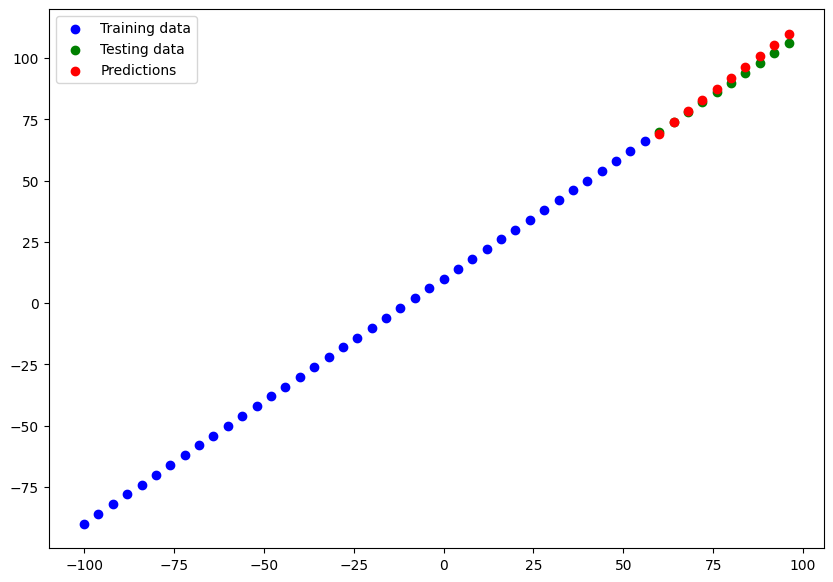

In [192]:
# Make and plot predictions to our model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(y_preds_1)

In [193]:
# Calculate model_1 metrics
mae_1 = tf.metrics.mae(y_test, tf.squeeze(y_preds_1)).numpy()
mse_1 = tf.metrics.mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(1.7819679, 4.7378345)

**build `model_2`** ➡ 2 layers, trained for 100 epochs.

In [194]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


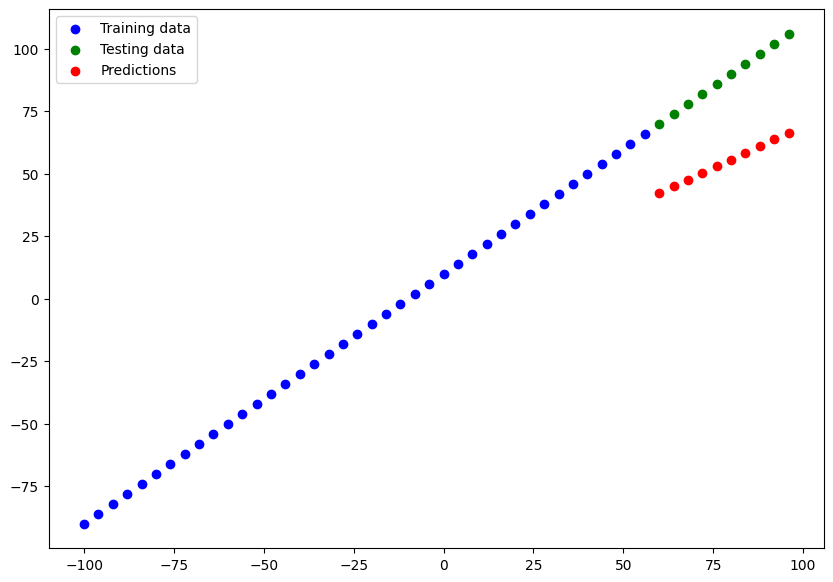

In [195]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(y_preds_2)

☣ **Ficou ainda pior**

In [196]:
# Calculate model_2 metrics
mae_2 = tf.metrics.mae(y_test, tf.squeeze(y_preds_2)).numpy()
mse_2 = tf.metrics.mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(33.653492, 1146.8005)

**Build `model_3`** ➡ 2 layers, trained for 500 epochs.

In [197]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


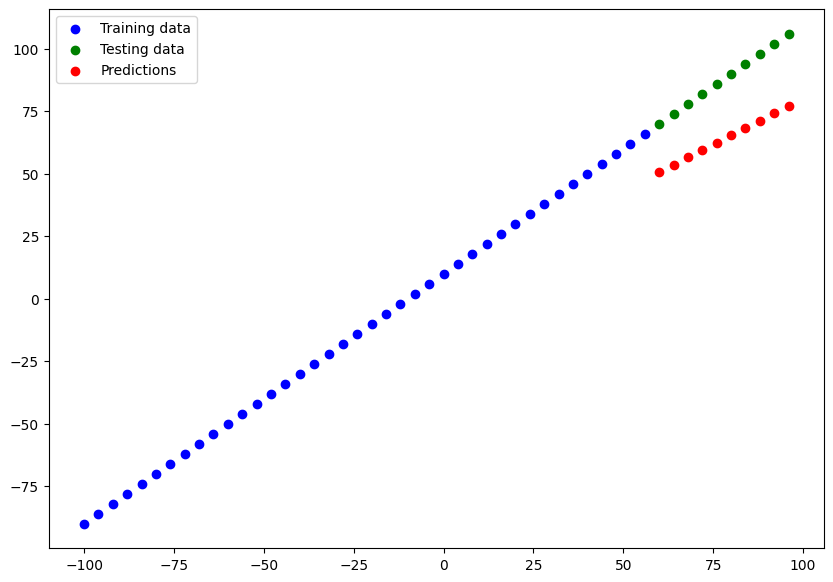

In [198]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(y_preds_3)

☣ **And even worse**

In [199]:
mae_3 = tf.metrics.mae(y_test, tf.squeeze(y_preds_3)).numpy()
mse_3 = tf.metrics.mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(24.045567, 587.49493)

**build `model_4`**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


(1.284333, 2.228004)

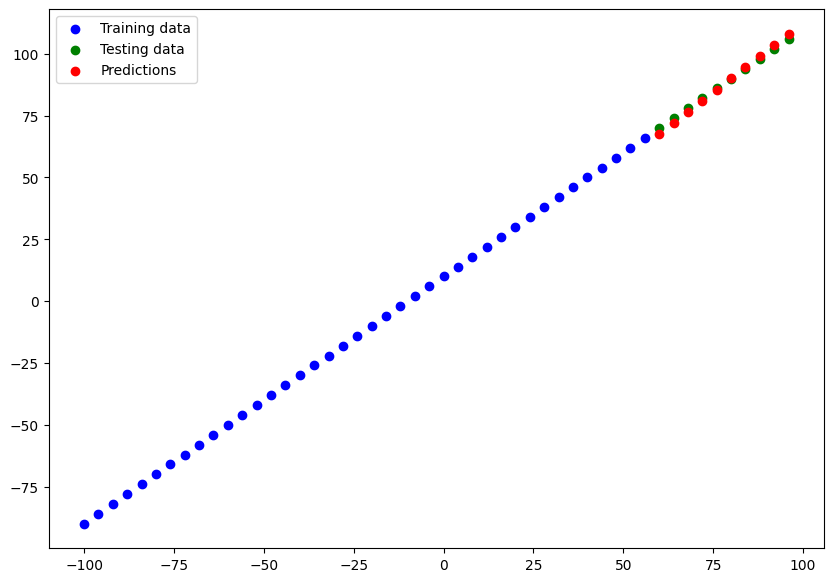

In [200]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,
           optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
           metrics=['mae'])

model_4.fit(tf.expand_dims(X_test, axis=-1), y_test, epochs=100, verbose=0)

y_preds_4 = model_4.predict(X_test)
plot_predictions(y_preds_4)

mae_4 = tf.metrics.mae(y_test, tf.squeeze(y_preds_4)).numpy()
mse_4 = tf.metrics.mse(y_test, y_preds_4.squeeze()).numpy()
mae_4, mse_4

# Comparing results

Now we've got results for 3 similar but slightly different results, let's compare them

In [201]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]
model_results

[['model_1', 1.7819679, 4.7378345],
 ['model_2', 33.653492, 1146.8005],
 ['model_3', 24.045567, 587.49493]]

In [202]:
# import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,1.781968,4.737834
1,model_2,33.653492,1146.800537
2,model_3,24.045567,587.494934


In [203]:
model_1.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

From our experiments, it looks like `model_1` performed the best.

And now, you might be thinking, "wow, comparing models is tedious..." and it definitely can be, we've only compared 3 models here.

But this is part of what machine learning modelling is about, trying many different combinations of models and seeing which performs best.

Each model you build is a small experiment.

> 🔑 Note: One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

Another thing you'll also find is what you thought may work (such as training a model for longer) may not always work and the exact opposite is also often the case.

# Tracking your experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

> 📖 **Resource**: But as you build more models, you'll want to look into using tools such as:

[TensorBoard](https://tensorboard.dev/) - a component of the TensorFlow library to help track modelling experiments (we'll see this later).

[Weights & Biases](https://www.wandb.com/) - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

## Saving a model

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using `model.save()`.

There are two ways to save a model in TensorFlow:

1. The keras format (default).
2. The [HDF5](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format) format.

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [204]:
# Saving model using the SavedModel format
model_4.save("model_4_saved.keras")

In [205]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls model_4_saved.keras

model_4_saved.keras


In [206]:
# Save a model using the HDF5 format
model_4.save("model_4_saved.h5") # note the addition of '.h5' on the end

In [207]:
# Check it out
!ls model_4_saved.h5

model_4_saved.h5


## Loading a model

We can load a saved model using the `load_model()` method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particular formats are correct).

In [208]:
# Load a model from the keras format
loaded_saved_model_keras = tf.keras.models.load_model("model_4_saved.keras")
loaded_saved_model_keras.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8 (36.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6 (28.00 B)

In [209]:
# Compare model_4 with the keras version (should return True)
model_4_preds = model_4.predict(X_test)
saved_model_preds = loaded_saved_model_keras.predict(X_test)
tf.metrics.mae(y_test, saved_model_preds.squeeze()).numpy() == tf.metrics.mae(y_test, model_4_preds.squeeze()).numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


True

In [210]:
# Load a model from the SavedModel format
loaded_saved_model_h5 = tf.keras.models.load_model("model_4_saved.h5")
loaded_saved_model_h5.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [211]:
# Compare model_2 with the SavedModel version (should return True)
model_4_preds = model_4.predict(X_test)
saved_model_preds = loaded_saved_model_h5.predict(X_test)
tf.metrics.mae(y_test, saved_model_preds.squeeze()).numpy() == tf.metrics.mae(y_test, model_4_preds.squeeze()).numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


True

## Downloading a model (from Google Colab)

Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:

* Right click on the file in the files pane and click 'download'.
* Use the code below.

In [212]:
# Download the model (or any file) from Google Colab
# from google.colab import files
# files.download("best_model_HDF5_format.h5")

# A larger example

Alright, we've seen the fundamentals of building neural network regression models in TensorFlow.

Let's step it up a notch and build a model for a more feature rich dataset.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, `age`, `sex`, `bmi`, `children`, `smoking_status` and `residential_region`.

To do, we'll leverage the pubically available [Medical Cost dataset](https://www.kaggle.com/mirichoi0218/insurance) available from Kaggle and [hosted on GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv).

> 🔑 **Note:** When learning machine learning paradigms, you'll often go through a series of foundational techniques and then practice them by working with open-source datasets and examples. Just as we're doing now, learn foundations, put them to work with different problems. Every time you work on something new, it's a good idea to search for something like "problem X example with Python/TensorFlow" where you substitute X for your problem.

In [213]:
# Option 1: Install the file from Github and paste it in ficheiros
# O mau desta opção é que sempre que ligava-me ao servidores, tinha que sempre carregar
# o ficheiro!!!
# insurance = pd.read_csv('insurance.csv')

# Option 2: Open from the URL Github Raw
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We're going to have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).

To do so, we'll use the `get_dummies()` method in pandas.

It converts categorical variables (like the `sex`, `smoker` and `region` columns) into numerical variables using one-hot encoding.

In [214]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [215]:
# Create the X and y(the features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [216]:
# Create training and test set
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # set random state for reproducible splits

len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [217]:
X_train  # It's perfect and have index randoms!!!:)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,True,False,True,False,False,True,False,False
1285,47,24.320,0,True,False,True,False,True,False,False,False
1142,52,24.860,0,True,False,True,False,False,False,True,False
969,39,34.320,5,True,False,True,False,False,False,True,False
486,54,21.470,3,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,True,False,True,False,True,False,False,False
1130,39,23.870,5,True,False,True,False,False,False,True,False
1294,58,25.175,0,False,True,True,False,True,False,False,False
860,37,47.600,2,True,False,False,True,False,False,False,True


Now we can build and fit a model (we'll make it the same as `model_4`).

In [218]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13096.7764 - mae: 13096.7764   
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12246.3711 - mae: 12246.3711 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11407.8799 - mae: 11407.8799  
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10625.3457 - mae: 10625.3457 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9953.2930 - mae: 9953.2930   
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9379.9854 - mae: 9379.9854
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8891.9775 - mae: 8891.9775 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8486.1201 - mae: 8486.1201 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8158.9868 - mae: 8158.9868
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7901.5303 - mae: 7901.5303 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7701.4297 - mae: 7701.4297 
Epoch 12/100
34/34 ━━━━━━━━━━━

In [219]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7159.6567 - mae: 7159.6567  


[6990.55029296875, 6990.55029296875]

Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:

* Increasing the number of layers (2 -> 3).
* Increasing the number of units in each layer (except for the output layer).
* Changing the optimizer (from SGD to Adam).

Everything else will stay the same.

In [220]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=300, verbose=0)

In [221]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3212.5710 - mae: 3212.5710  


[3164.894775390625, 3164.894775390625]

Much better! Using a larger model and the Adam optimizer results in almost half the error as the previous model.

🔑 **Note:** For many problems, the Adam optimizer is a great starting choice. See Andrei Karpathy's "Adam is safe" point from [A Recipe for Training Neural Networks](http://karpathy.github.io/2019/04/25/recipe/) for more.

Let's check out the loss curves of our model, we should see a downward trend.

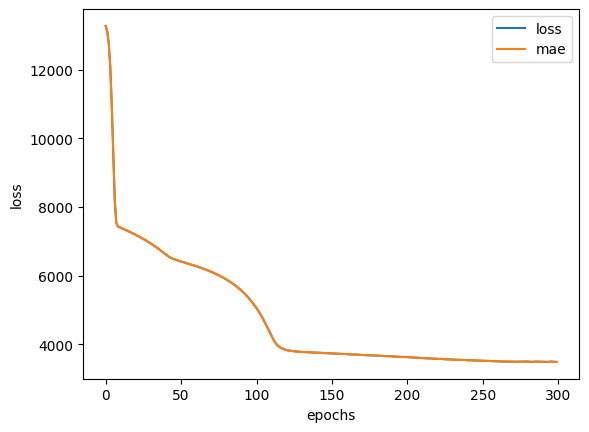

In [222]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

From this, it looks like our model's loss (and MAE) were both still decreasing (in our case, MAE and loss are the same, hence the lines in the plot overlap eachother).

What this tells us is the loss might go down if we try training it for longer.

> 🤔 **Question:** How long should you train for?

It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) so it stops automatically when it stops improving. We'll see this in another module.

Let's train the same model as above for a little longer. We can do this but calling fit on it again.

In [223]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

How did the extra training go?

In [224]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3210.0278 - mae: 3210.0278 


(3162.3583984375, 3162.3583984375)

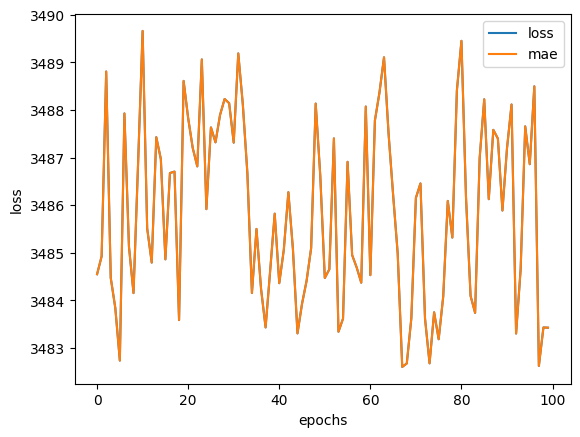

In [225]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

## Preprocessing data (normalization and standardization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call **standardization** which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:

* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* Feature scaling:
  * Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minimum. This is also referred to as min-max scaling.
  * Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by subtracting the mean value from the target feature and then dividing it by the standard deviation.
  * Which one should you use?
    * **With neural networks you'll tend to favour normalization** as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

> 📖 **Resource:** For more on preprocessing data, I'd recommend reading the following resources:

[Scikit-Learn's documentation on preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data).

[Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02).

We've already turned our data into numbers using `get_dummies()`, let's see how we'd normalize it as well.

In [226]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:

* `make_column_transformer` - build a multi-step data preprocessing function for the folllowing transformations:
  * `MinMaxScaler` - make sure all numerical columns are normalized (between 0 and 1).
  * `OneHotEncoder` - one hot encode the non-numerical columns.

Let's see them in action.

In [227]:
# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# from sklearn.model_selection import train_test_split

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

Now we've normalized it and one-hot encoding it, what does our data look like now?

In [228]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [229]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

How about the shapes?

In [230]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

Our data is normalized and numerical, let's model it.

We'll use the same model as `insurance_model_2`

In [231]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(200),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_3 = insurance_model_3.fit(X_train_normal, y_train, epochs=50, verbose=0)

Let's evaluate the model on normalized test set.

In [232]:
# Evaluate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3213.4946 - mae: 3213.4946  


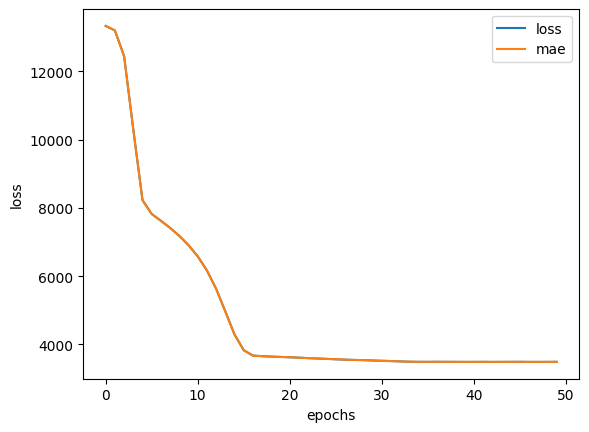

In [233]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

And finally, let's compare the results from `insurance_model_2` (trained on non-normalized data) and `insurance_model_3` (trained on normalized data).

In [234]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(3162.3583984375, 3160.112548828125)

This is **one of the main benefits of normalization: faster convergence time** (a fancy way of saying, your model gets to better results faster).

`insurance_model_2` may have eventually achieved the same results as `insurance_model_3` if we left it training for longer.

Also, the results may change if we were to alter the architectures of the models, e.g. more hidden units per layer or more layers.

But since our main goal as neural network practitioners is to decrease the time between experiments, anything that helps us get better results sooner is a plus.

Code feito no Gemini: E tem um melhor mae!!!

In [235]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor

# Preprocessamento
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])

# Hiperparâmetros para tunar
param_grid = {
    'regressor__n_estimators': [100, 200, 500],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.1, 0.01, 0.001]
}

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Melhor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Avaliação
print('MAE:', tf.metrics.mae(y_test, y_pred).numpy())

MAE: 2439.007


# ⚒ Exercise

We've a covered a whole lot pretty quickly.

So now it's time to have a **play around** with a few things and start to build up your intuition.

I emphasise the words play around because that's very important. Try a few things out, run the code and see what happens.

1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
* Building a larger model (how does one with 4 dense layers go?).
* Increasing the number of units in each layer.
* Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?
4. Import the Boston pricing dataset from TensorFlow `tf.keras.datasets` and model it.

In [236]:
X =np.array([i for i in range(-100, 500, 1)])
y = X + 3

# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # set random state for reproducible splits

X_train = tf.constant(X_train)
y_train = tf.constant(y_train)
X_test = tf.constant(X_test)
y_test = tf.constant(y_test)

Epoch 1/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 151.2406 - mae: 151.2406
Epoch 2/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29.7302 - mae: 29.7302
Epoch 3/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.9423 - mae: 8.9423
Epoch 4/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8446 - mae: 2.8446
Epoch 5/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.2125 - mae: 2.2125
Epoch 6/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8924 - mae: 1.8924
Epoch 7/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8629 - mae: 1.8629
Epoch 8/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2164 - mae: 2.2164
Epoch 9/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6192 - mae: 2.6192
Epoch 10/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6684 - mae: 1.6684
Epoch 11/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1594 - mae: 1.1594
Epoch 12/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7593 - mae: 2.7593
Epoch 13/90
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 

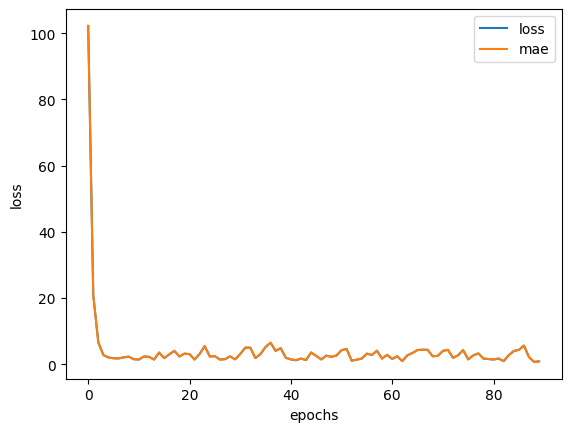

In [240]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

history = model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=90)

# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

In [241]:
model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred[:10], y_test[:10]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1244 - mae: 1.1244  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


(array([[ 12.923222],
        [320.44238 ],
        [465.75125 ],
        [-20.303432],
        [ 83.570366],
        [186.08156 ],
        [-88.236336],
        [370.20566 ],
        [-19.287905],
        [250.7738  ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 13, 322, 468, -20,  84, 187, -87, 372, -19, 252])>)

In [242]:
model.save("model_saved.keras")

Epoch 1/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 126187.4922 - mse: 126187.4922
Epoch 2/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 117.3551 - mse: 117.3551
Epoch 3/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5534 - mse: 3.5534
Epoch 4/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4883 - mse: 2.4883
Epoch 5/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4265 - mse: 2.4265
Epoch 6/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5248 - mse: 2.5248
Epoch 7/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3853 - mse: 2.3853
Epoch 8/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3470 - mse: 2.3470
Epoch 9/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4804 - mse: 2.4804
Epoch 10/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3076 - mse: 2.3076
Epoch 11/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2435 - mse: 2.2435
Epoch 12/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1962 - mse: 2.1962
Epoch 13/60
50/50 ━━━━━━━━━━━━━━━━━

(array([[ 863.1769  ],
        [-644.0875  ],
        [ 335.82455 ],
        [ -92.27877 ],
        [ 291.7951  ],
        [ 275.7844  ],
        [ -59.290684],
        [ 734.09076 ],
        [-931.9876  ],
        [ 325.81784 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 863, -644,  336,  -92,  292,  276,  -59,  734, -932,  326])>)

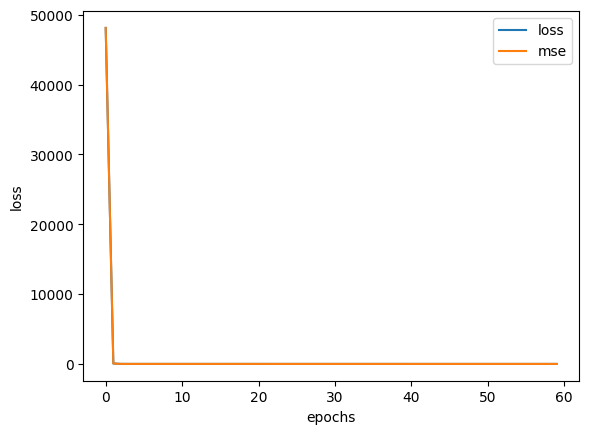

In [261]:
X =np.array([i for i in range(-1000, 1000, 1)])
y = X + 3

# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # set random state for reproducible splits

X_train = tf.constant(X_train)
y_train = tf.constant(y_train)
X_test = tf.constant(X_test)
y_test = tf.constant(y_test)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mse'])

history = model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=60)

# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred[:10], y_test[:10]

In [263]:
model.save('model_mse.keras')

In [270]:
model.predict(tf.constant([30000]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[30022.877]], dtype=float32)

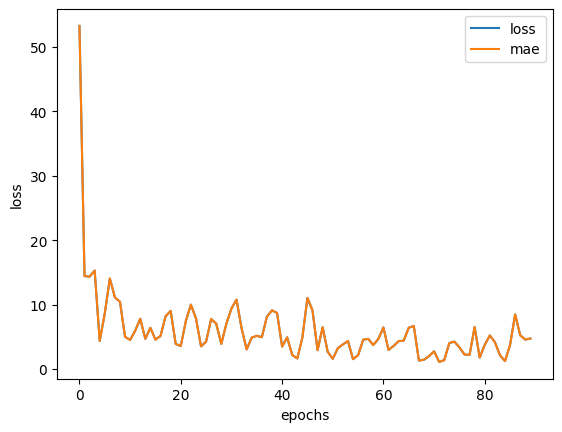

In [226]:
# 1. Create the model
larger_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(500),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
larger_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
larger_model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=0)

# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

In [229]:
larger_model.evaluate(X_test, y_test)
y_pred = larger_model.predict(X_test)
y_pred[:10], y_test[:10]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.8613 - mae: 9.8613 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


(array([[ 12.43034 ],
        [307.1382  ],
        [446.38522 ],
        [-19.043312],
        [ 80.146385],
        [178.3824  ],
        [-82.94438 ],
        [354.82556 ],
        [-18.089565],
        [240.37592 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 13, 322, 468, -20,  84, 187, -87, 372, -19, 252])>)

In [234]:
data = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)
data

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

In [235]:
(X_train, y_train), (X_test, y_test) = data
X_train = tf.constant(X_train)
y_train = tf.constant(y_train)
X_test = tf.constant(X_test)
y_test = tf.constant(y_test)
X_train, y_train

(<tf.Tensor: shape=(404, 13), dtype=float64, numpy=
 array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
         3.96900e+02, 1.87200e+01],
        [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
         3.95380e+02, 3.11000e+00],
        [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         3.75520e+02, 3.26000e+00],
        ...,
        [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
         3.62250e+02, 7.83000e+00],
        [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
         2.61950e+02, 1.57900e+01],
        [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
         3.76700e+02, 4.38000e+00]])>,
 <tf.Tensor: shape=(404,), dtype=float64, numpy=
 array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
        17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
        32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
        23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. ,

In [236]:
# 1. Create the model
boston_pricing_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
boston_pricing_model.compile(loss=tf.keras.losses.mae,
                             optimizer=tf.keras.optimizers.Adam(),
                             metrics=["mae"])

# 3. Fit the model
boston_pricing_model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 17.5844 - mae: 17.5844
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7510 - mae: 8.7510 
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8756 - mae: 7.8756 
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5578 - mae: 7.5578 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4513 - mae: 7.4513 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3304 - mae: 7.3304 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6130 - mae: 7.6130 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2517 - mae: 7.2517 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4001 - mae: 7.4001 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5375 - mae: 7.5375 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2753 - mae: 7.2753 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3909 - mae: 7.3909 
Epoch 13/100
13/13 ━━━━━

In [237]:
# Evaluate model
boston_pricing_model.evaluate(tf.expand_dims(X_test, axis=1), y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.0204 - mae: 7.0204  


[7.252926826477051, 7.252926826477051]

In [238]:
boston_pricing_model.summary()

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_91 (Dense)                     │ (None, 1, 100)              │           1,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 1, 10)               │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 1, 1)                │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,265 (28.38 KB)

 Trainable params: 2,421 (9.46 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,844 (18.93 KB)

In [239]:
# 1. Create the model
boston_pricing_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
boston_pricing_model.compile(loss=tf.keras.losses.mae,
                             optimizer=tf.keras.optimizers.Adam(),
                             metrics=["mae"])

# 3. Fit the model
boston_pricing_model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=200)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 41.5065 - mae: 41.5065
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.1883 - mae: 11.1883 
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.6434 - mae: 8.6434 
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7627 - mae: 7.7627  
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2739 - mae: 7.2739 
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1071 - mae: 7.1071  
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1196 - mae: 7.1196 
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0748 - mae: 7.0748 
Epoch 9/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0713 - mae: 7.0713 
Epoch 10/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.0597 - mae: 7.0597 
Epoch 11/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0712 - mae: 7.0712  
Epoch 12/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1348 - mae: 7.1348 
Epoch 13/200
13/13 

In [240]:
# Evaluate model
boston_pricing_model.evaluate(tf.expand_dims(X_test, axis=1), y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.2522 - mae: 6.2522  


[6.630579471588135, 6.630579471588135]

In [241]:
# 1. Create the model
boston_pricing_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(500),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
boston_pricing_model.compile(loss=tf.keras.losses.mae,
                             optimizer=tf.keras.optimizers.Adam(),
                             metrics=["mae"])

# 3. Fit the model
boston_pricing_model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=200)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 196.1321 - mae: 196.1321
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 74.4963 - mae: 74.4963
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - loss: 52.6333 - mae: 52.6333
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 244ms/step - loss: 32.4649 - mae: 32.4649
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - loss: 20.5655 - mae: 20.5655
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 11.7448 - mae: 11.7448
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 8.6919 - mae: 8.6919
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 11.6216 - mae: 11.6216
Epoch 9/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 14.8896 - mae: 14.8896
Epoch 10/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 11.9593 - mae: 11.9593
Epoch 11/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 12.0822 - mae: 12.0822
Epoch 12/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 14.3450 - mae: 14.3

In [242]:
# Evaluate model
boston_pricing_model.evaluate(tf.expand_dims(X_test, axis=1), y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.2776 - mae: 6.2776 


[6.634581089019775, 6.634581089019775]

# <img src='https://media.istockphoto.com/id/479135672/pt/foto/v%C3%AA-lo-em-breve.jpg?s=612x612&w=0&k=20&c=sA7QRUQyRX9HvYqHy6_9ikviRcjuCpoNbnsifHLeB2A=' width=750>